<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#План-проекта" data-toc-modified-id="План-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>План проекта</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## План проекта

1. Загрузить и изучить данные.
2. Ответьтить на вопрос и обосновать решение. 
Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?<br>
2.1 Изменится. Приведите примеры матриц.<br>
2.2 Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
3. Предложить алгоритм преобразования данных для решения задачи. Обосновать, почему качество линейной регрессии не поменяется.
4. Запрограммировать этот алгоритм, применив матричные операции. Проверить, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применить метрику R2.

## Загрузка данных

In [1]:
from numpy.linalg import inv
from scipy.spatial import distance
from scipy.spatial.distance import cityblock
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Импорт данных

In [2]:
try:
    df = pd.read_csv('insurance.csv')
except:
    df = pd.read_csv('/datasets/insurance.csv')

Вывод основной информации о данных

In [3]:
def show_i(data):

    '''Выводим на экран следущую информацию:

    - размер таблицы
    - основную информацию
    - первые 5 строк таблицы
    - суммарная статистика по числовым параметрам
    - типы данных'''

    display(data.shape)
    display(data.info())
    display(data.head())
    display(data.describe())
    display(data.dtypes)

In [4]:
show_i(df)

(5000, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Пол                    int64
Возраст              float64
Зарплата             float64
Члены семьи            int64
Страховые выплаты      int64
dtype: object

Изменим тип данных признака `Возраст` с вещественных на цельные числа

In [5]:
df['Возраст'] = df['Возраст'].astype('int64')

Проверяем изменение

In [6]:
display(df.dtypes)

Пол                    int64
Возраст                int64
Зарплата             float64
Члены семьи            int64
Страховые выплаты      int64
dtype: object

Находим дубликаты

In [7]:
# df_train дубликаты
print('df_train дубликаты:', df.duplicated().sum())

df_train дубликаты: 153


Удаляем дубликаты

In [8]:
df = df.drop_duplicates()

Проверяем результат и выводим размер новой таблицы

In [9]:
print('df_train дубликаты:', df.duplicated().sum())
df.shape

df_train дубликаты: 0


(4847, 5)

Посмотрм как респределены параметры

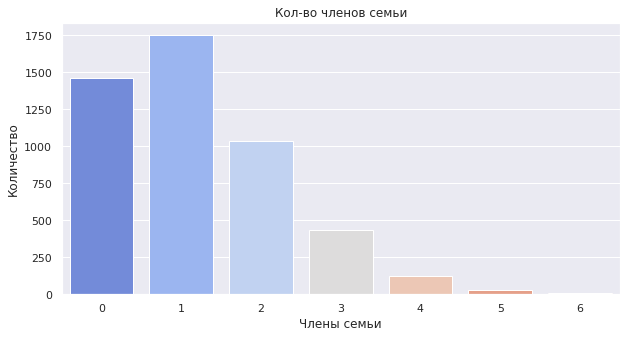

In [10]:
sns.set()
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='Члены семьи', data=df, palette='coolwarm')
ax.set_title('Кол-во членов семьи')
plt.ylabel('Количество');

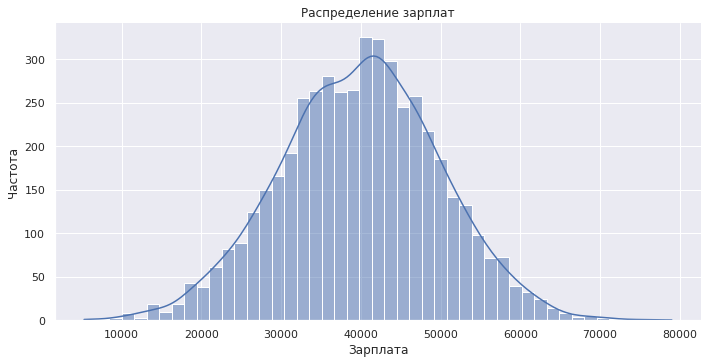

In [11]:
sns.displot(data=df, x='Зарплата', kde=True, height=5, aspect=2)
plt.title('Распределение зарплат')
plt.ylabel('Частота')
plt.show()

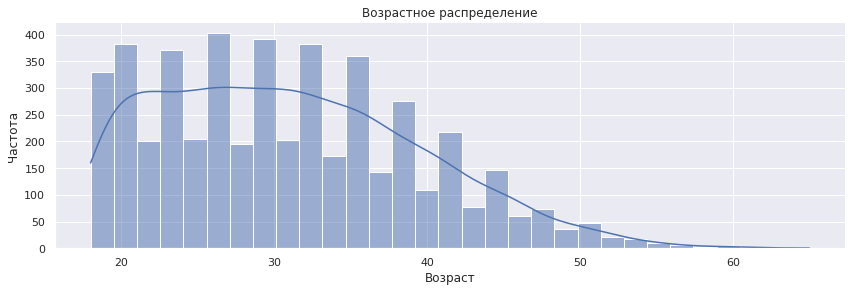

In [12]:
sns.displot(data=df, x='Возраст', kde=True, height=4, aspect=3)
plt.title('Возрастное распределение')
plt.ylabel('Частота')
plt.show()

`Вывод:` в процессе предобработки мы изменити типы данных с вещественных на цельночисловые и удалили дубликаты. Также был произведён ИАД в везультате которого мы выявили нормальное распределение зарплат и скошенное распределение кол-ва членов семьи и возраста.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Делим на целевую и нецелевую выборки

In [13]:
features = df.drop(['Страховые выплаты'], axis=1)
target = df['Страховые выплаты']

# выводим итоговые размеры таблиц
print(features.shape)
print(target.shape)

(4847, 4)
(4847,)


Записываем формулы вычисления весов

In [14]:
# находим веса w
class LinearReg:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv((X.T @ X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]
        print(w)
# находим предсказания        
    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

Создаём модель на основании формулы весов и предсказываем используя формулу предсказаний

In [15]:
model = LinearReg()
model.fit(features, target)
predictions = model.predict(features)
r2_score(target, predictions)

[-9.51709995e-01  9.46018141e-03  3.61640081e-02 -1.38991363e-07
 -1.42517371e-02]


0.4302010044852068

Создаём новую случайную квадратную матрицу нормального распределения

[[ 1.60098441  0.79192065 -1.61751022  0.85087347]
 [-0.16840195 -0.24761543  0.11452115  2.79886233]
 [ 0.23096748 -1.531157   -0.5529058  -1.00833114]
 [-0.03479558  0.72697382 -0.15815315 -0.08386654]]


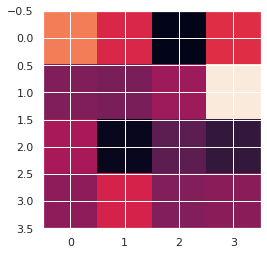

In [16]:
# размер новой матрицы 4х4 соответствует ширине изначальной матрицы - 4 колонки
r_matrix = np.random.normal(0, 1, (features.shape[1], features.shape[1]))
print(r_matrix)
plt.imshow(r_matrix)

Находим обратную матрицу

In [17]:
np.linalg.inv(r_matrix)

array([[ 0.63985193, -0.68409358, -1.09053495, -3.22691718],
       [ 0.04831865, -0.11695576, -0.3323613 ,  0.583072  ],
       [ 0.05994716, -0.56142839, -1.26487349, -2.92061636],
       [ 0.0403205 ,  0.32875239, -0.04326445, -0.0230698 ]])

Умножаем изначальную матрицу на обратную, результатом должна быть единичная матрица

In [18]:
E = r_matrix @ np.linalg.inv(r_matrix)
E

array([[ 1.00000000e+00,  2.53689904e-17, -8.99229422e-17,
         3.20976703e-16],
       [-3.05527021e-17,  1.00000000e+00,  2.18713801e-17,
         7.72712399e-18],
       [ 1.34457960e-17,  4.11369534e-17,  1.00000000e+00,
        -1.43693272e-16],
       [-4.38401754e-19, -5.64448967e-17, -1.91449856e-17,
         1.00000000e+00]])

`Вывод:` Главная диагональ матрицы состоит из единиц, значит результат перемножения матриц - единичная матрица

Кодируем изначальные признаки умножая их на обратную матрицу

In [19]:
hidden_features = features @ r_matrix 
hidden_features

,0,1,2,3
0,11450.648860,-75954.020705,-27421.207809,-49897.704338
1,8768.983064,-58194.629464,-21005.310452,-38187.919639
2,4845.433484,-32161.477918,-11607.700616,-21093.786999
3,9627.738004,-63852.993017,-23054.083081,-41988.800294
4,6025.137033,-39969.339099,-14429.252210,-26238.223818
...,...,...,...,...
4995,8240.754293,-54667.784304,-19735.846654,-35919.221398
4996,12096.935641,-80240.318927,-28968.528177,-52741.474449
4997,7826.360040,-51909.720775,-18741.532389,-34126.616239
4998,7550.428445,-50071.308707,-18079.592054,-32910.254136


Находим метрику модели после шифрования

In [20]:
model= LinearReg()
model.fit(hidden_features, target)
predictions = model.predict(hidden_features)
r2_score(target, predictions)

[-0.95170998  0.0273028  -0.01208222  0.02188758  0.01259923]


0.4302010044852076

Как связаны параметры линейной регрессии в исходной задаче и в преобразованной?<br>
Предсказания высчитываются по формуле: $$ a = Xw $$

Т.к. новая матрица признаков получается умножением исходной Х
 на случайную (обозначим М
), то формула применит вид:
$$ a = XMw $$

Формула обучения:
$$ w = (X^T X)^{-1} X^T y $$

Перепишем формулу нахождения весов:

$$ w' = ((XM)^T XM)^{-1}(XM)^T y $$

Раскрываем скобки:

$$ w' = ((X^T M^T  XM)^{-1} X^T M^T y) $$

 $ (M^T)^{-1} M^T $ это единичная матрица 
, матрица умножаясь на единичную равна себе, сократим запись:

$$ w' = M^{-1}(X^T X)^{-1} X^T y $$

То есть новые веса 
 выражаются через исходные 
 следующим образом:

$$ w' = M^{-1} w $$

Докажем что векторы a и a' равны:

$$ a'=XP((XP)^T XP)^{-1} (XP)^T y $$

Используем правило матричного преобразования $ (𝐴𝐵)^𝑇=𝐵^𝑇𝐴^𝑇 $

$$ a'=XP(P^TX^T XP)^{-1} P^TX^T y $$

Обратная матрица произведения равна произведению обратных матриц в обратном порядке:

$$ a'=XPP^{-1}(P^T X^T X)^{-1}P^T X^T y $$
$$ a'=XPP^{-1} (X^T X)^{-1}(P^T)^{-1}P^T X^T y $$

При умножении матрицы на её обратную получается единичная матрица:

$$ a'=X(X^T X)^{-1}X^T y $$

Помним что $ w = (X^T X)^{-1} X^T y $

$$ a'=Xw $$

Така как a'=Xw в итоге получаем:

$$ a'=a $$


`Вывод:`
Качество линейной регрессии не изменилось.

**Ответ:** Умножив признаки на обратимую матрицу, качество линейной регрессии не изменилось.

**Обоснование:** Веса изменились под новые значения, т.е. признаки исходной матрицы и преобразованной выражаются через коэффициенты (веса w), поэтому качество линейной регресии не изменилось

## Алгоритм преобразования

**Алгоритм**

Для защиты информации на этапе поиска коэффициентов регрессии и предсказаний регрессии будем умножать матрицу признаков на обратимую матрицу $Y$, которая будет генерироваться случайным образом.

Этапы алгоритма:
1. Составление матрицы $Y$.
2. Проверка матрицы на обратимость. Вычисление детерминанта матрицы $Y$.
3. Получение матрицы преобразованных признаков $Z = XY$.
4. Применение алгоритма на преобразованных признаках $Z$.

Матрица $Y$ должна иметь необходимую размерность $(nxn)$, где n - количество признаков для регрессии.
Таким образом матрица $Z$ будет иметь туже размерность, что и матрица $X$. Обратная матрица $Y$ существует только для квадратных невырожденных матриц (определитель которых не равен нулю).

Пример:

$
X = \begin{pmatrix}
1 & 2 \\
2 & 3 \\
4 & 5  
\end{pmatrix}
\qquad 
Y = \begin{pmatrix}
1 & 0 \\
2 & 3 \\  
\end{pmatrix}
\qquad det  Y = 3 $

Найдем значние Z:

$
Z = \begin{pmatrix}
1 & 2 \\
2 & 3 \\
4 & 5  
\end{pmatrix} \begin{pmatrix}
1 & 0 \\
2 & 3 \\  
\end{pmatrix} = \begin{pmatrix}
1*1+2*2 & 1*0+2*3  \\
2*1+3*2 & 2*0+3*3  \\
4*1+5*2 & 4*0+5*3   
\end{pmatrix} = \begin{pmatrix}
5 & 6 \\
8 & 9 \\
14 & 15  
\end{pmatrix}$

In [21]:
def encode(features):
    random_matrix = np.random.normal(0, 1, (features.shape[1], features.shape[1]))
    encoded_features = features.dot(random_matrix)
    return encoded_features

In [22]:
encode(features)

,0,1,2,3
0,41095.805514,-52845.647123,8928.365491,-28027.924231
1,31480.637617,-40503.313322,6810.023450,-21474.960903
2,17396.120555,-22386.952224,3756.230193,-11868.156335
3,34554.758465,-44415.307224,7534.577624,-23562.100420
4,21622.850901,-27814.247228,4684.637439,-14749.381058
...,...,...,...,...
4995,29579.815853,-38035.828396,6429.219386,-20173.246360
4996,43419.048350,-55819.335900,9452.787643,-29608.853678
4997,28090.387344,-36110.888656,6118.854695,-19155.237096
4998,27094.728260,-34835.657023,5895.199373,-18477.699331


Для расшифровки данных напишем алгоритм - функцию дешифрования, принимающая на вход зашифрованную матрицу encoded_features и возвращающая исходную features:

In [23]:
def decode(encoded_features):
    decoded_features = round(abs(encoded_features.dot(np.linalg.inv(r_matrix))))
    for i in decoded_features.iloc[:, [0, 3]]:
        decoded_features[i] = decoded_features[i].astype(int)
    decoded_features.columns = features.columns
    return decoded_features

In [24]:
decode(hidden_features)

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0
...,...,...,...,...
4995,0,28.0,35700.0,2
4996,0,34.0,52400.0,1
4997,0,20.0,33900.0,2
4998,1,22.0,32700.0,3


In [25]:
features

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600.0,1
1,0,46,38000.0,1
2,0,29,21000.0,0
3,0,21,41700.0,2
4,1,28,26100.0,0
...,...,...,...,...
4995,0,28,35700.0,2
4996,0,34,52400.0,1
4997,0,20,33900.0,2
4998,1,22,32700.0,3


Данные полностью восстановлены после кодирования

Докажем, почему качество линейной регрессии не поменяется. Предсказания высчитываются по формуле:

$$ a = Xw $$

Т.к. новая матрица признаков получается умножением исходной Х
 на случайную (обозначим М
), то формула применит вид:

$$ a' = XMw' $$

Подставив вычисленное значение весов 
 получаем:

 $$ a' = XMM^{-1}w $$

 это еденичная матрица 
, т.е. можно сократить:

$$ a' = Xw = a $$

Предсказания по исходной и преобразованной матрицам равны.

`Вывод:`
Предложенный алгоритм преобразования данных справляется для решения задачи.

Качество линейной регрессии не меняется, т.к. новые признаки равны $ XM $
, а новые веса $ w'=M^{-1} w $
, поэтому $ a'= Xw = a $
. Новые признаки выражаются через исходную, умножив на случайную матрицу, соответственно и новые коэффициенты весов. Но так как оба множителя в произведении выражают исходные через определенные коэффициенты, то качество линейной регресии не измениться.

## Проверка алгоритма

Проверим, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применим метрику R2.

Создадим модель sklearn_model и обучим на 2 обучающих матрицах:

исходной features
кодированной hidden_features

In [26]:
sklearn_model = LinearRegression().fit(features, target)
pred = sklearn_model.predict(features)
r2_score(target, pred)

0.4302010044852066

In [27]:
sklearn_model.fit(hidden_features, target)
pred = sklearn_model.predict(hidden_features)
r2_score(target, pred)

0.4302010044852105

`Вывод:`
Качество метрики R2 для 2 матриц признаков: до преобразования и после равны, а также равны R2 по написанному класс линейной регресии LinearReg, что говорит о ее правильном написании в сравнении с моделью из sklearn.

`Общий вывод:`
Проведенные исследования позволили сделать следующие выводы:

- Умножив признаки на обратимую матрицу, качество линейной регрессии не меняется. Это обусловленно тем, что веса изменились под новые значения, т.е. признаки исходной матрицы и преобразованной выражаются через коэффициенты (веса w), поэтому качество линейной регресии не изменилось

- Предложенный алгоритм преобразования данных справляется для решения задачи шифрования признаков.

- Зашифрованные данные так же пригодны для предсказаний с помощью линейной регресии

- Алгоритм позволяет дешифровать данные в любой момент

- Случайность реализованная в алгоритме каждый раз меняется при запуске, что делает зашифрованные данные каждый раз новыми. Такой вид исходных данных становиться очень сложно восстановить без кода программы.

- Реализованный алгоритм полностью удовлетворяет поставленной задаче Защиты персональных данных клиентов страховой компании